In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
from imports import *
from xgboost import plot_importance, XGBClassifier # or XGBRegressor
import shap
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [2]:
# read and basic filterig 

In [3]:
raw_df_index_filter= utils_data.read_and_basic_clean_filter_data('Subscription_Prediction.csv')

data loss from filter data pass 24 hours of installment 0.1192074351361817
data loss from filter data pass for subscription less than 24h from installation 0.0
data loss: due to filter_usage_before_installment func 0.0020334139371290805


In [4]:
100*utils_data.get_ration_of_clases(raw_df_index_filter)

1.2508363690431938

In [107]:
bins =50
df_time_firtst_session = (raw_df_index_filter
.sort_values(by = 'device_timestamp')
 .groupby(['id_for_vendor','app_session_id'])
 .first()
 .groupby('id_for_vendor')
 .sum()
 [['usage_duration']]
 .assign(time_firtst_session = lambda df: df['usage_duration'])
 [['time_firtst_session']]
)

,time_firtst_session
count,5884.000000
mean,285.462847
std,2293.708258
min,0.956793
25%,17.420675
50%,52.477400
75%,137.055975
max,76731.679000


Text(0.5, 0, 'time [s]')

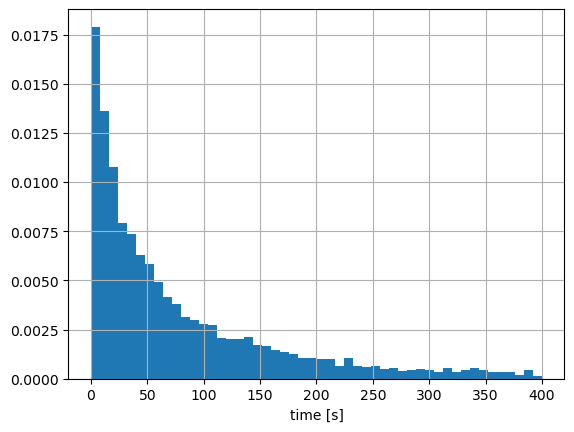

In [111]:
display(data_table[['time_firtst_session','subscriber']] 
.pipe(lambda df: df[df['subscriber']==0])
[ ['time_firtst_session']]
 .describe()
)
(data_table[['time_firtst_session','subscriber']] 
.pipe(lambda df: df[df['subscriber']==0])
 ['time_firtst_session']
 .hist(
     range =[0,400
            ]
      ,bins =bins
     ,density=1
 )
)
plt.xlabel('time [s]')

,time_firtst_session
count,45.000000
mean,324.179499
std,1403.619827
min,4.547060
25%,28.217700
50%,88.440900
75%,164.120280
max,9500.660400


Text(0.5, 0, 'time [s]')

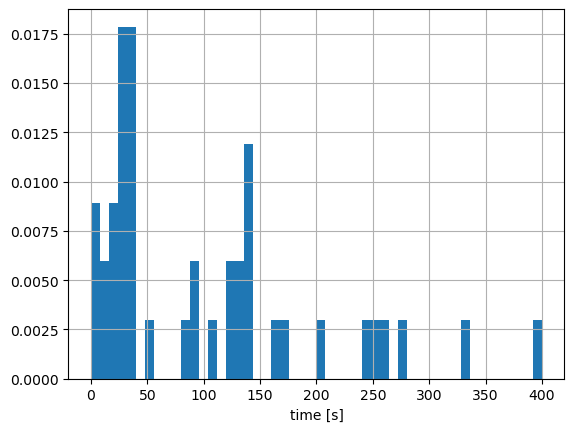

In [113]:
display(data_table[['time_firtst_session','subscriber']] 
.pipe(lambda df: df[df['subscriber']==1])
[ ['time_firtst_session']]
 .describe()
)

(data_table[['time_firtst_session','subscriber']] 
.pipe(lambda df: df[df['subscriber']==1])
 ['time_firtst_session']
 .hist(range =[0,400]
                   ,bins =bins
       ,density=1
      )
)
plt.xlabel('time [s]')


In [117]:
raw_df_index_filter.loc['RFGRJ9643Q']

,device_timestamp,feature_name,app_session_id,accepted,usage_duration,install_date,country,device,subscription_date,subscriber,time_from_install_to_last_usage,time_from_install_to_subscribe
id_for_vendor,,,,,,,,,,,,
RFGRJ9643Q,2019-01-03 01:19:27.624,Relight,5CBB8DAB-4073-49F2-B610-65677E8FEE49,False,281.5790,2019-01-03 01:11:57,United Kingdom,UIDeviceKindIPad5G,NaT,0,0.116667,NaN
RFGRJ9643Q,2019-01-03 01:23:11.565,Eyes,5CBB8DAB-4073-49F2-B610-65677E8FEE49,True,220.7870,2019-01-03 01:11:57,United Kingdom,UIDeviceKindIPad5G,NaT,0,0.183333,NaN
RFGRJ9643Q,2019-01-03 01:23:55.127,Eyes,5CBB8DAB-4073-49F2-B610-65677E8FEE49,False,39.3004,2019-01-03 01:11:57,United Kingdom,UIDeviceKindIPad5G,NaT,0,0.183333,NaN
RFGRJ9643Q,2019-01-03 22:38:48.918,Eyes,3BAA9E69-8262-43D1-92D6-D3B9C9B77E31,False,76450.1000,2019-01-03 01:11:57,United Kingdom,UIDeviceKindIPad5G,NaT,0,21.433333,NaN


In [122]:
data_table[[]]

,total_usage_time,num_unique_features,num_of_unique_sessions,accepted_mean,actions_count,gdp_value,delta_s_between_sessions_mean,delta_s_between_sessions_median,delta_s_between_sessions_std,device_ipad,device_iphone,device_ipod,action_per_session,time_firtst_session,normalize_usage_time,subscriber
id_for_vendor,,,,,,,,,,,,,,,,
AAFZH6202K,0.025279,4,2,0.000000,5,3.0,23.000000,20.0,18.681542,0,1,0,2.500000,30.81957,0.126395,0
AALQS7971S,0.105710,4,1,0.333333,6,3.0,64.000000,90.0,41.454795,0,1,0,6.000000,95.49010,0.634262,0
AANDQ6521X,0.096092,3,1,0.200000,5,3.0,93.750000,106.0,72.048016,0,1,0,5.000000,93.39460,0.480462,0
AASCO1660V,0.188798,3,2,0.250000,8,3.0,140.166667,115.5,110.624440,0,1,0,4.000000,145.67601,1.510385,0
AASTE4561L,0.334910,6,2,0.375000,16,3.0,65.000000,36.5,73.294978,0,1,0,8.000000,477.94300,5.358561,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZZNUU8567O,0.124486,3,1,0.750000,4,3.0,128.000000,95.0,85.422479,0,1,0,4.000000,83.36610,0.497942,0
ZZULG0733Y,0.110007,8,2,0.153846,13,3.0,43.090909,24.0,52.874293,0,1,0,6.500000,37.47230,1.430085,0
ZZWBM0398F,0.013616,2,1,0.000000,2,3.0,62.000000,62.0,0.000000,0,1,0,2.000000,19.76800,0.027233,0


In [5]:
(raw_df_index_filter
 [['time_from_install_to_subscribe','install_date', 'subscription_date','subscriber']].dropna()
 .groupby('id_for_vendor').first()
 .assign(time_from_install_to_subscribe = lambda df: df['time_from_install_to_subscribe']/24)
 [['time_from_install_to_subscribe']].describe()
 # .pipe(lambda df: df[df['time_from_install_to_subscribe']<50])
)

,time_from_install_to_subscribe
count,45.000000
mean,23.097886
std,17.303693
min,2.019444
25%,7.800000
50%,20.815972
75%,34.334722
max,58.738889


array([[<AxesSubplot:title={'center':'time_from_install_to_subscribe'}>]],
      dtype=object)

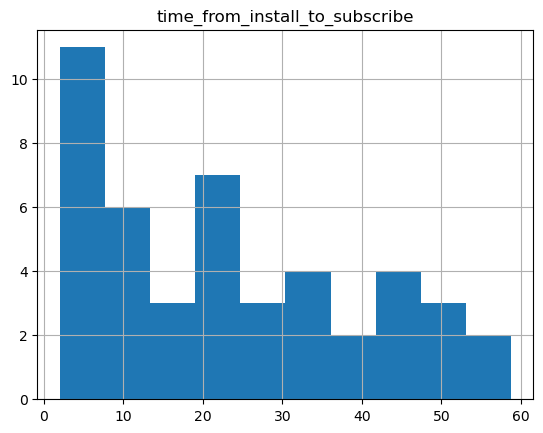

In [6]:
(raw_df_index_filter
 [['time_from_install_to_subscribe','install_date', 'subscription_date','subscriber']].dropna()
 .groupby('id_for_vendor').first()
 .assign(time_from_install_to_subscribe = lambda df: df['time_from_install_to_subscribe']/24)
 .hist('time_from_install_to_subscribe')
 # .pipe(lambda df: df[df['time_from_install_to_subscribe']<50])
)

In [7]:
# create some features 

In [50]:
df_from_numeric_agg =(utils_data
                      .get_features_from_numeric_data_with_agg(raw_df_index_filter)
                      .assign(total_usage_time= lambda df:df['total_usage_time']/(60*60))
                    
    )
users_gdp = utils_data.get_gdp_data_per_user(raw_df_index_filter)
df_delta_time_between_session_stats= utils_data.get_delta_time_between_session_stats(raw_df_index_filter)
devices_per_user_one_hot = utils_data.get_device_type_one_hot(raw_df_index_filter)
df_mean_action_per_sesssion=utils_data.get_mean_action_features_per_sesssion(raw_df_index_filter)

In [9]:
# joining the features, into data table 

In [51]:
data_table = df_from_numeric_agg.join(users_gdp).assign(subscriber = lambda df: df['subscriber'].astype('int')).dropna()
data_table=data_table.join(df_delta_time_between_session_stats,how= 'left').fillna(0)
data_table = data_table.join(devices_per_user_one_hot,how= 'left')
data_table = data_table.join(df_mean_action_per_sesssion, how = 'left')
# data_table = data_table.join(df_time_firtst_session, how = 'left')


In [52]:
data_table =(data_table
  .assign(normalize_usage_time = lambda df: df['total_usage_time']*(
     (df['num_of_unique_sessions'])*(df['action_per_session']) )
    )
         

)
data_table= data_table.pipe(lambda df: df[[col for col in df.columns if col != 'subscriber' ]+['subscriber']])

In [53]:
data_table[data_table.isnull().any(axis=1)]

,total_usage_time,num_unique_features,num_of_unique_sessions,accepted_mean,actions_count,gdp_value,delta_s_between_sessions_mean,delta_s_between_sessions_median,delta_s_between_sessions_std,device_ipad,device_iphone,device_ipod,action_per_session,time_firtst_session,normalize_usage_time,subscriber
id_for_vendor,,,,,,,,,,,,,,,,


In [54]:
data_table[data_table['subscriber']==1].shape[0]

45

In [55]:
data_table

,total_usage_time,num_unique_features,num_of_unique_sessions,accepted_mean,actions_count,gdp_value,delta_s_between_sessions_mean,delta_s_between_sessions_median,delta_s_between_sessions_std,device_ipad,device_iphone,device_ipod,action_per_session,time_firtst_session,normalize_usage_time,subscriber
id_for_vendor,,,,,,,,,,,,,,,,
AAFZH6202K,0.025279,4,2,0.000000,5,3.0,23.000000,20.0,18.681542,0,1,0,2.500000,30.81957,0.126395,0
AALQS7971S,0.105710,4,1,0.333333,6,3.0,64.000000,90.0,41.454795,0,1,0,6.000000,95.49010,0.634262,0
AANDQ6521X,0.096092,3,1,0.200000,5,3.0,93.750000,106.0,72.048016,0,1,0,5.000000,93.39460,0.480462,0
AASCO1660V,0.188798,3,2,0.250000,8,3.0,140.166667,115.5,110.624440,0,1,0,4.000000,145.67601,1.510385,0
AASTE4561L,0.334910,6,2,0.375000,16,3.0,65.000000,36.5,73.294978,0,1,0,8.000000,477.94300,5.358561,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZZNUU8567O,0.124486,3,1,0.750000,4,3.0,128.000000,95.0,85.422479,0,1,0,4.000000,83.36610,0.497942,0
ZZULG0733Y,0.110007,8,2,0.153846,13,3.0,43.090909,24.0,52.874293,0,1,0,6.500000,37.47230,1.430085,0
ZZWBM0398F,0.013616,2,1,0.000000,2,3.0,62.000000,62.0,0.000000,0,1,0,2.000000,19.76800,0.027233,0


In [56]:
data_table['subscriber']

id_for_vendor
AAFZH6202K    0
AALQS7971S    0
AANDQ6521X    0
AASCO1660V    0
AASTE4561L    0
             ..
ZZNUU8567O    0
ZZULG0733Y    0
ZZWBM0398F    0
ZZYMH3710E    0
ZZYVY2762C    0
Name: subscriber, Length: 5929, dtype: int64

In [57]:
subscriber, none_subscribers = utils_data.get_two_class_populations(data_table)

In [58]:
(subscriber.describe().add_suffix('_subscriber').join(none_subscribers.describe().add_suffix('_no_subscriber'))
.filter(like= 'total_usage_time')
)

,total_usage_time_subscriber,total_usage_time_no_subscriber
count,45.000000,5884.000000
mean,0.318082,0.193101
std,0.653162,0.685121
min,0.001263,0.000416
25%,0.059133,0.027872
50%,0.107620,0.077588
75%,0.346918,0.177299
max,4.180064,21.386602


In [59]:
data_table.columns


Index(['total_usage_time', 'num_unique_features', 'num_of_unique_sessions',
       'accepted_mean', 'actions_count', 'gdp_value',
       'delta_s_between_sessions_mean', 'delta_s_between_sessions_median',
       'delta_s_between_sessions_std', 'device_ipad', 'device_iphone',
       'device_ipod', 'action_per_session', 'time_firtst_session',
       'normalize_usage_time', 'subscriber'],
      dtype='object')

In [60]:
none_subscribers.describe()

,total_usage_time,num_unique_features,num_of_unique_sessions,accepted_mean,actions_count,gdp_value,delta_s_between_sessions_mean,delta_s_between_sessions_median,delta_s_between_sessions_std,device_ipad,device_iphone,device_ipod,action_per_session,time_firtst_session,normalize_usage_time,subscriber
count,5884.000000,5884.000000,5884.000000,5884.000000,5884.000000,5884.000000,5884.000000,5884.000000,5884.000000,5884.000000,5884.000000,5884.000000,5884.000000,5884.000000,5884.000000,5884.0
mean,0.193101,3.932529,1.534840,0.224633,9.097383,2.769205,68.898361,52.026513,58.880807,0.026852,0.966519,0.006628,5.725180,285.462847,4.285812,0.0
std,0.685121,2.989761,1.186491,0.275660,12.537370,0.526145,87.960355,80.810256,90.485605,0.161666,0.179903,0.081150,5.866755,2293.708258,24.150796,0.0
min,0.000416,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.956793,0.000416,0.0
25%,0.027872,2.000000,1.000000,0.000000,2.000000,3.000000,24.487500,17.000000,0.000000,0.000000,1.000000,0.000000,2.000000,17.420675,0.071701,0.0
50%,0.077588,3.000000,1.000000,0.125000,5.000000,3.000000,51.414286,34.000000,34.648232,0.000000,1.000000,0.000000,4.000000,52.477400,0.402057,0.0
75%,0.177299,5.000000,2.000000,0.375000,11.000000,3.000000,87.000000,62.000000,74.703097,0.000000,1.000000,0.000000,7.333333,137.055975,1.784827,0.0
max,21.386602,17.000000,24.000000,1.000000,258.000000,3.000000,2814.000000,2814.000000,1088.268770,1.000000,1.000000,1.000000,123.000000,76731.679000,720.098011,0.0


In [61]:
data_table.corr().loc['subscriber']

total_usage_time                   0.015838
num_unique_features                0.027104
num_of_unique_sessions             0.032347
accepted_mean                      0.006449
actions_count                      0.040429
gdp_value                          0.008756
delta_s_between_sessions_mean     -0.001863
delta_s_between_sessions_median   -0.010713
delta_s_between_sessions_std       0.014967
device_ipad                       -0.014470
device_iphone                      0.016212
device_ipod                       -0.007116
action_per_session                 0.020065
time_firtst_session                0.001469
normalize_usage_time               0.026436
subscriber                         1.000000
Name: subscriber, dtype: float64

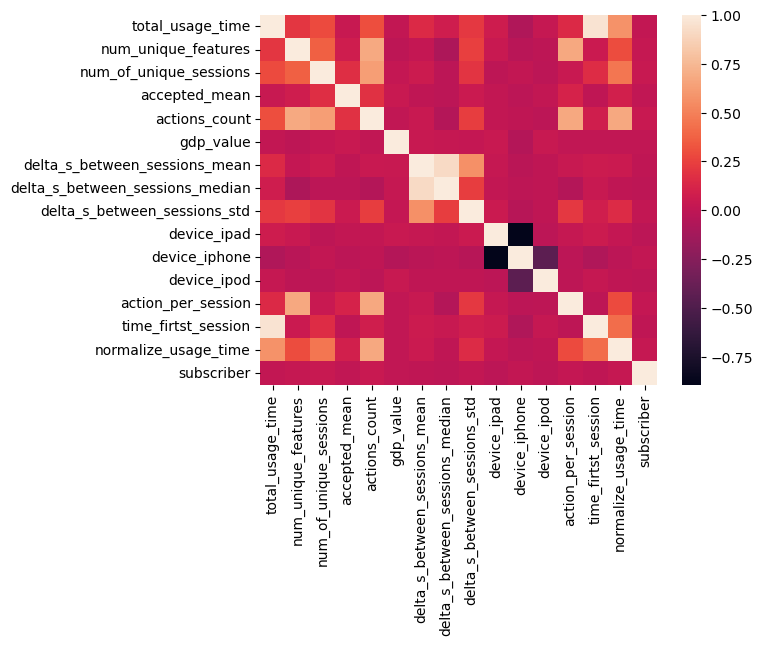

In [62]:
sns.heatmap(data_table.corr());

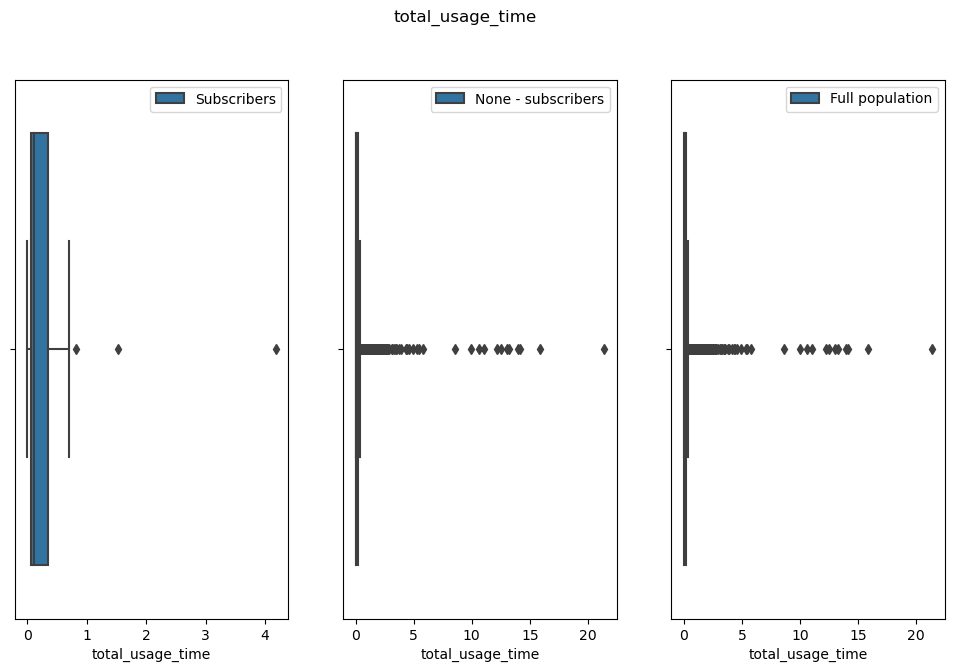

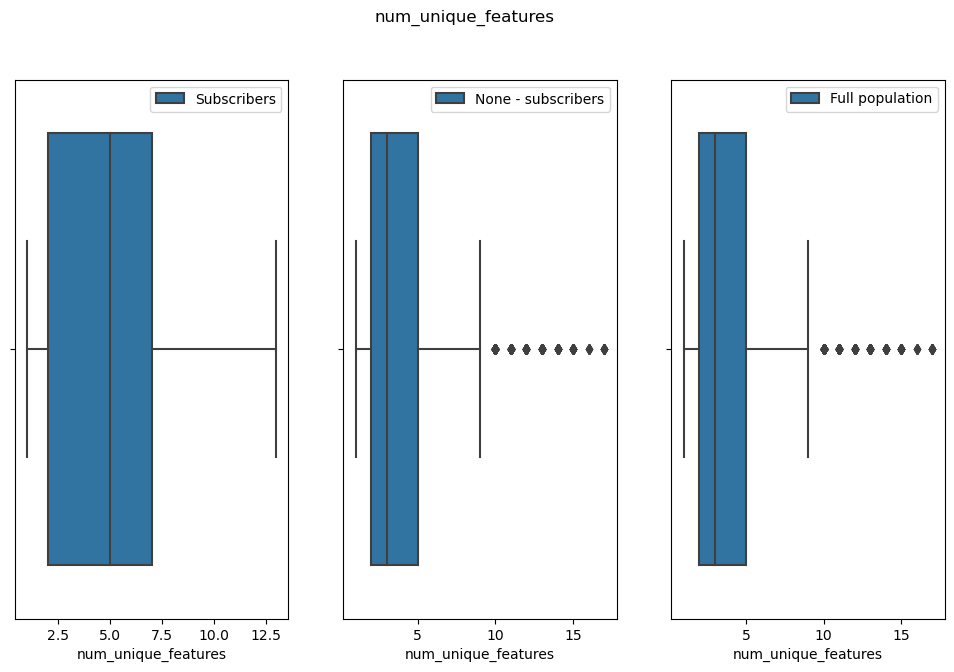

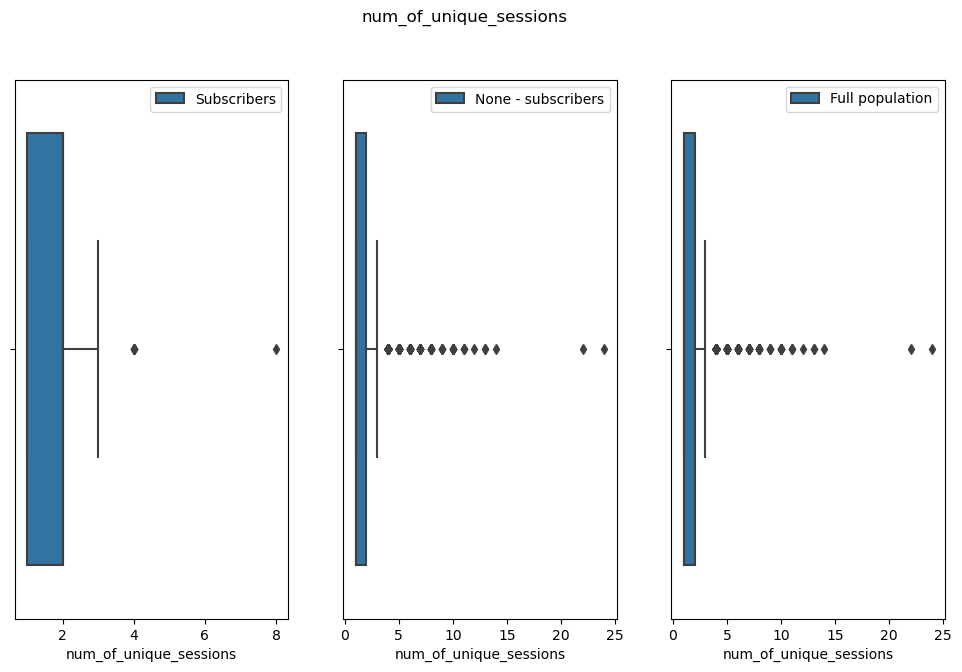

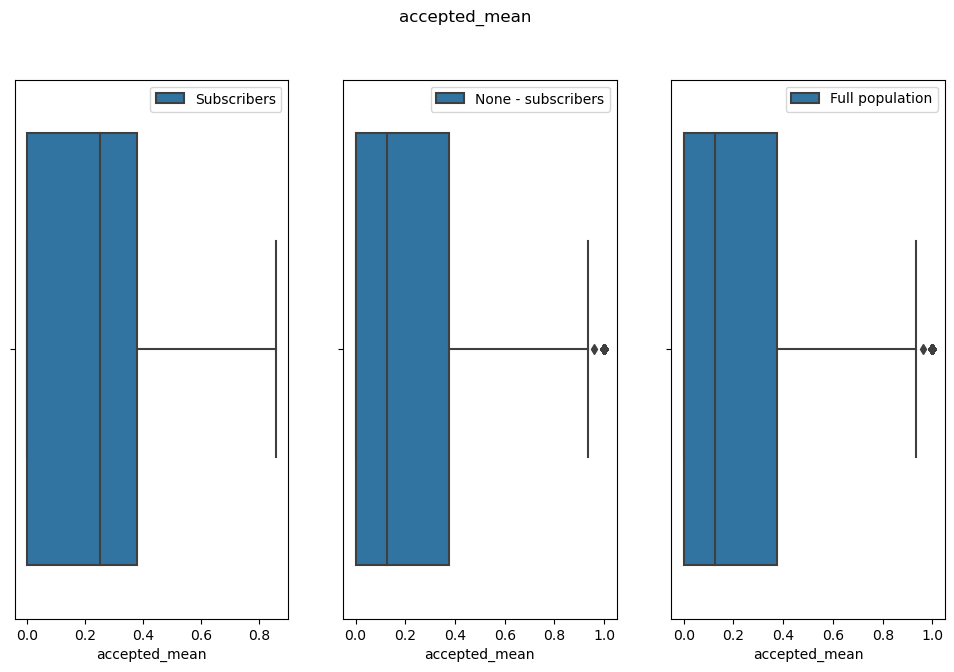

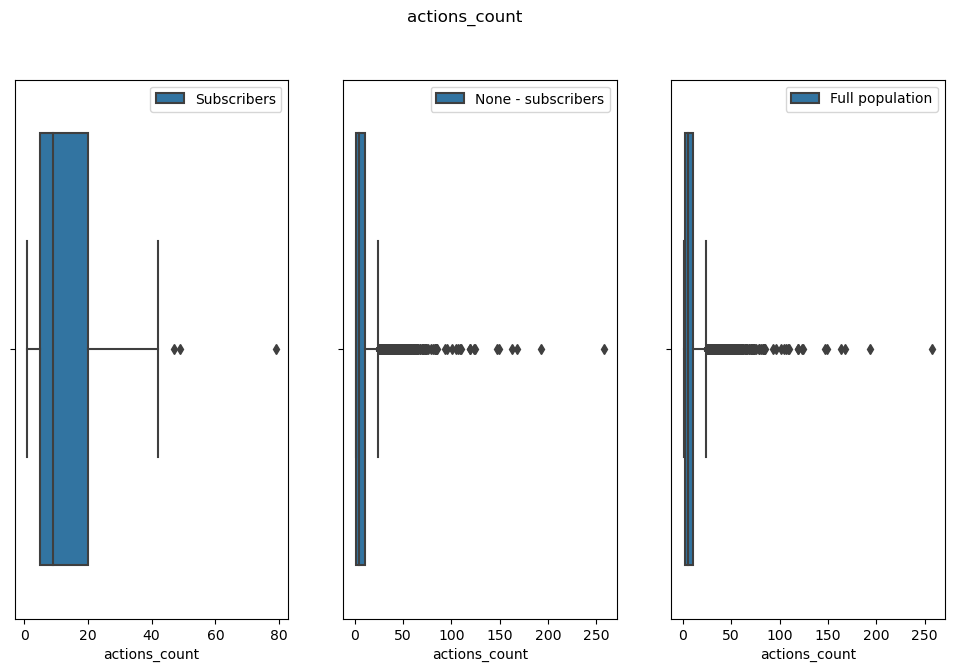

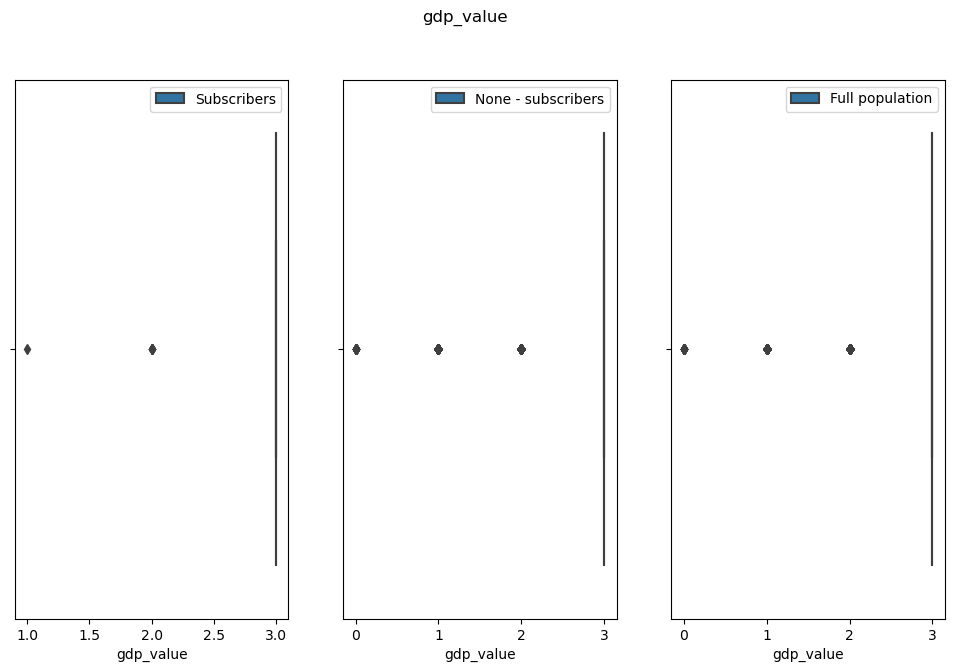

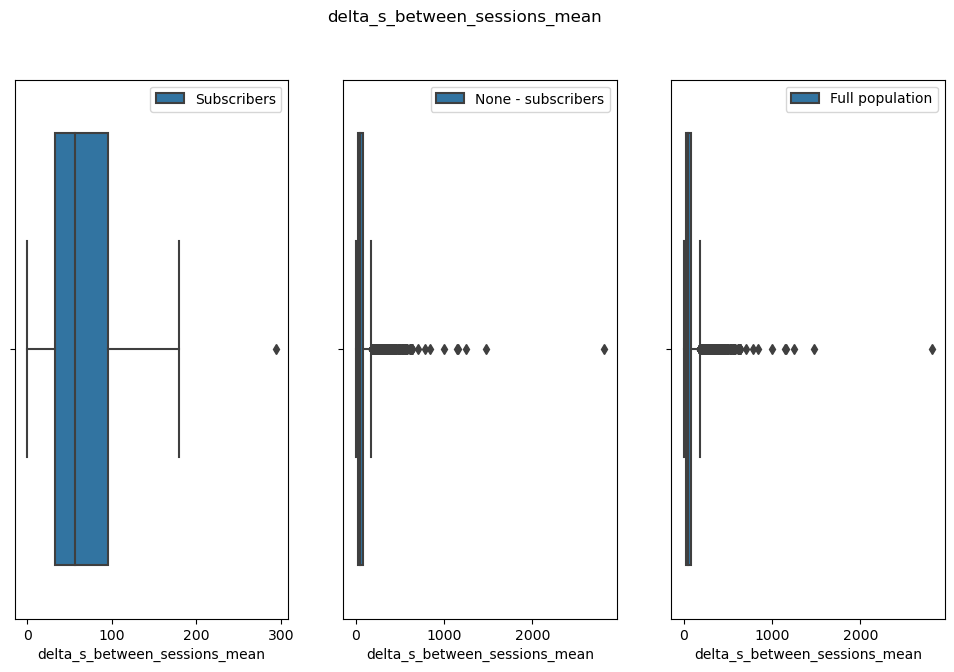

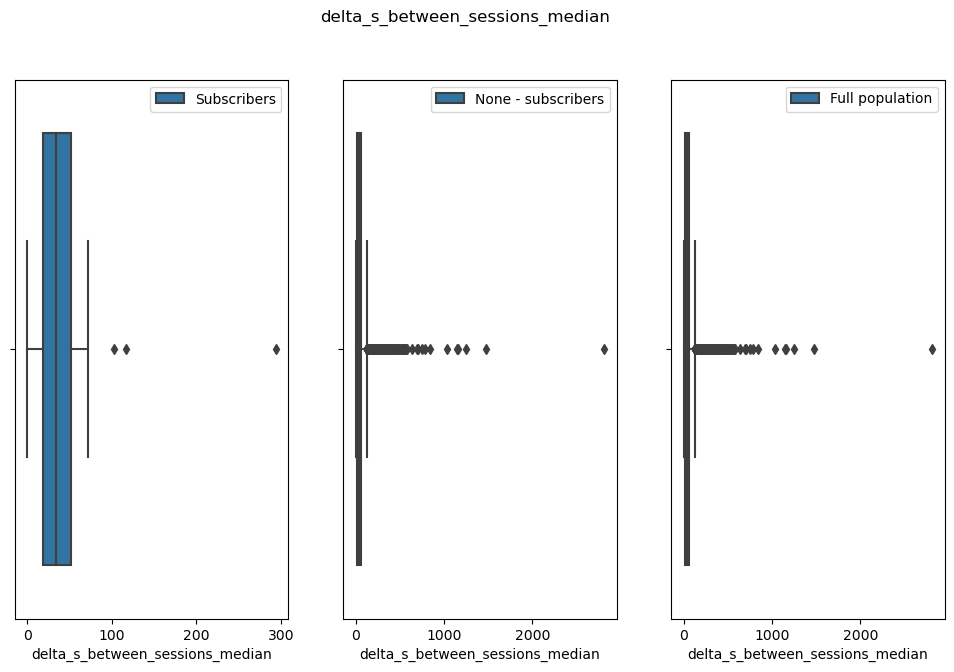

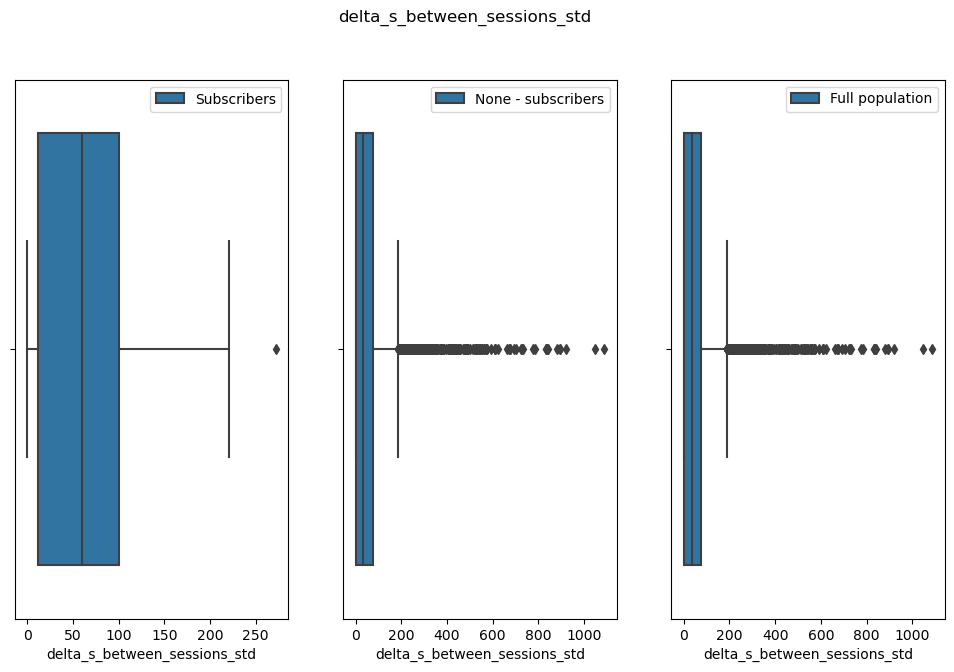

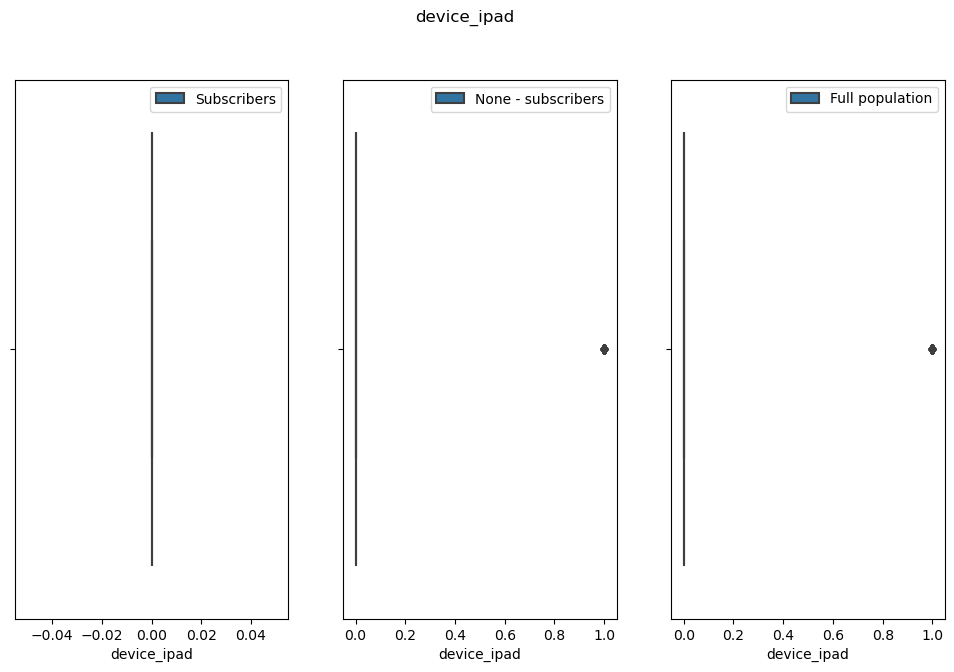

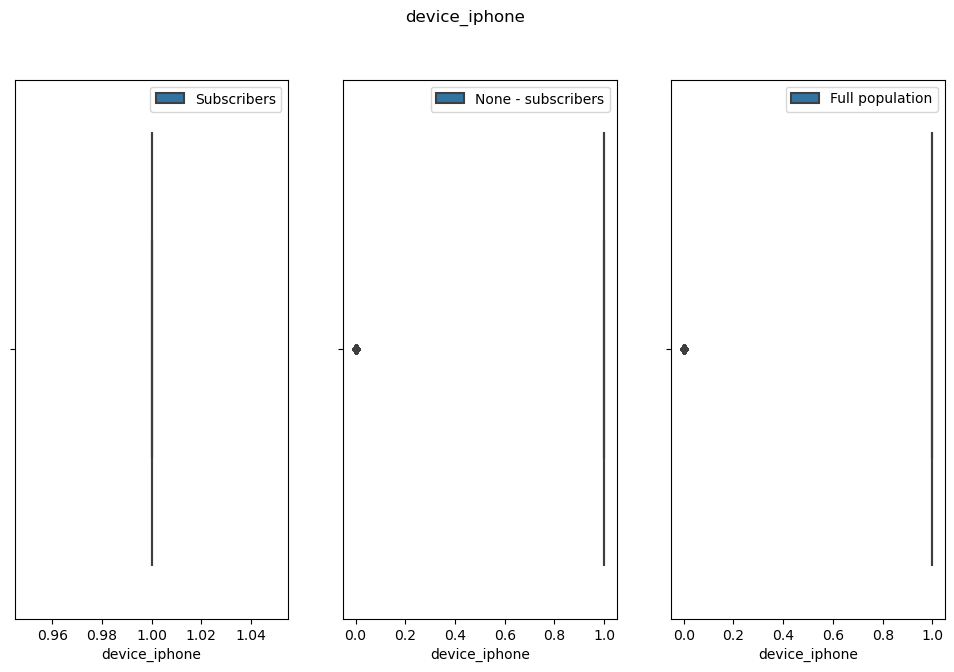

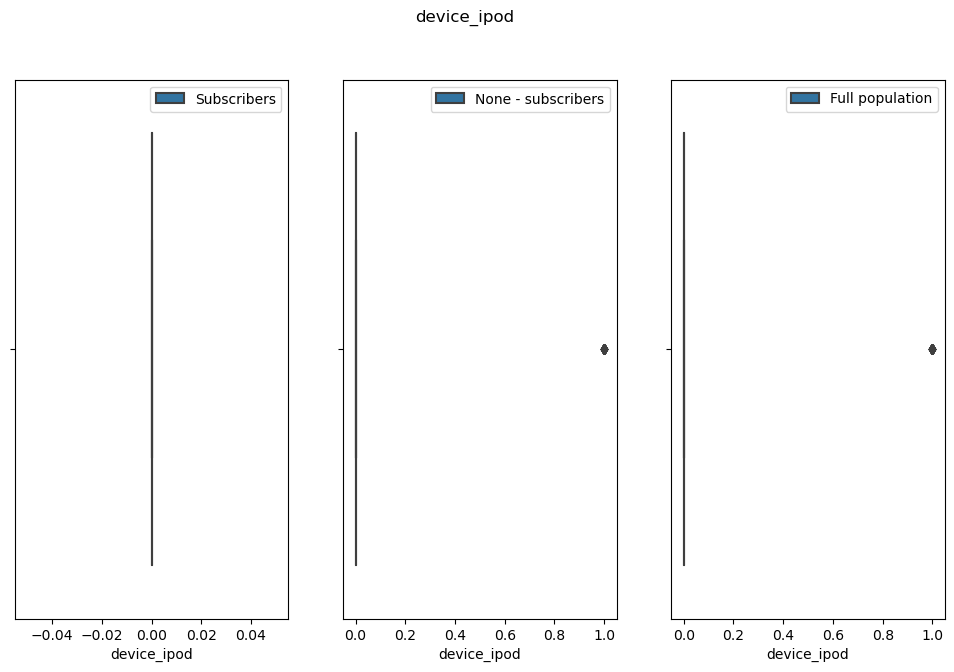

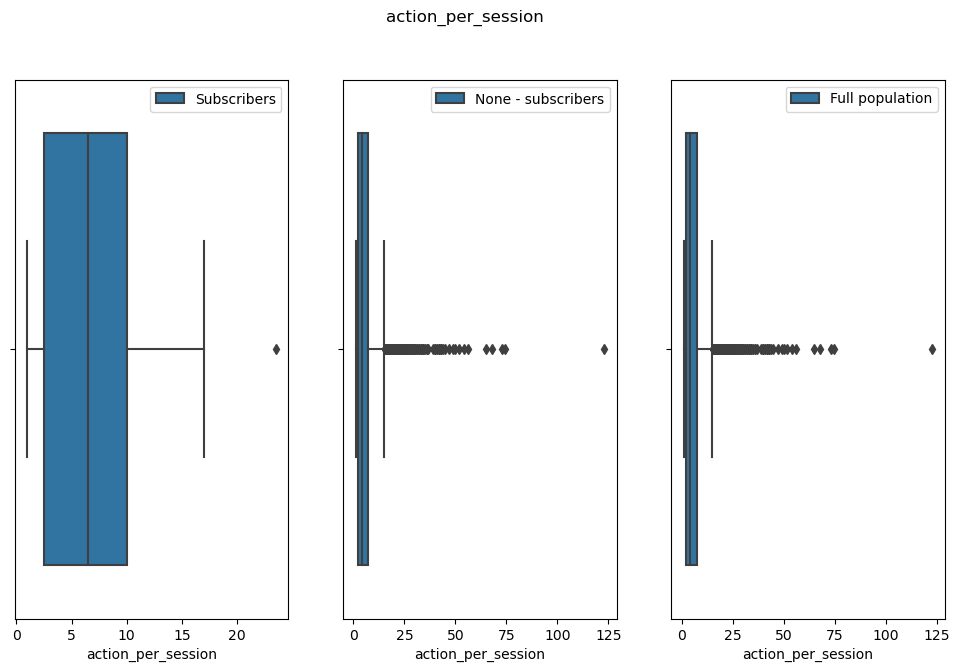

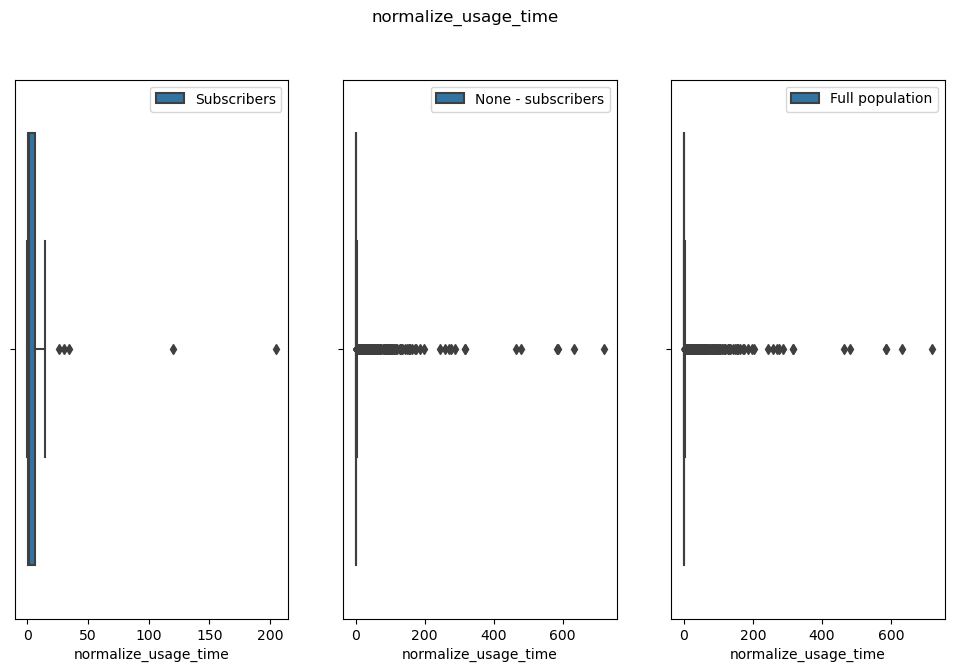

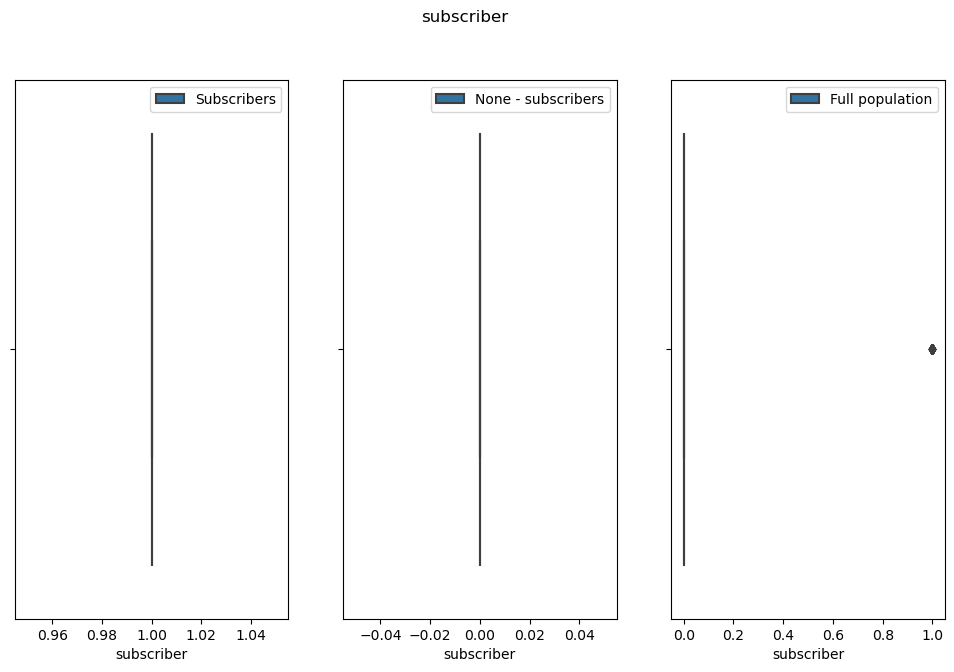

In [30]:
utils_data.plot_box_plot(data_table)

In [13]:
# devide the data 
# train for test, train for validation, a

In [63]:


X_train, X_test, y_train, y_test= model_utils.get_train_test(data_table, test_size=0.3, )
X_train_and_validation = X_train.join(y_train)

X_train_val, X_val, y_train_val, y_val = model_utils.get_train_test(X_train_and_validation, test_size=0.3)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
                             

In [64]:
# finding the best weight

In [65]:
# xgb
weights = [  100,1000,2000,4000,5000,6000,8000, 10000]
param_grid = dict(scale_pos_weight=weights)
max_depth =6
n_estimators= 100
learning_rate = 0.3
model_xgb = XGBClassifier(max_depth =max_depth, n_estimators= n_estimators, learning_rate = learning_rate)


In [66]:

grid_result = model_utils.find_best_results_for_weights(model_xgb,param_grid, cv,'f1',X_train, y_train )
scale_pos_weight = grid_result.best_params_['scale_pos_weight']
model_xgb = XGBClassifier(scale_pos_weight=scale_pos_weight, max_depth =max_depth, n_estimators= n_estimators, learning_rate = learning_rate )


{'scale_pos_weight': 5000}


In [67]:
scale_pos_weight

5000

In [68]:
X_train[X_train.isnull().any(axis=1)]

,total_usage_time,num_unique_features,num_of_unique_sessions,accepted_mean,actions_count,gdp_value,delta_s_between_sessions_mean,delta_s_between_sessions_median,delta_s_between_sessions_std,device_ipad,device_iphone,device_ipod,action_per_session,time_firtst_session,normalize_usage_time
id_for_vendor,,,,,,,,,,,,,,,


Best Threshold=0.000065, G-Mean=0.477


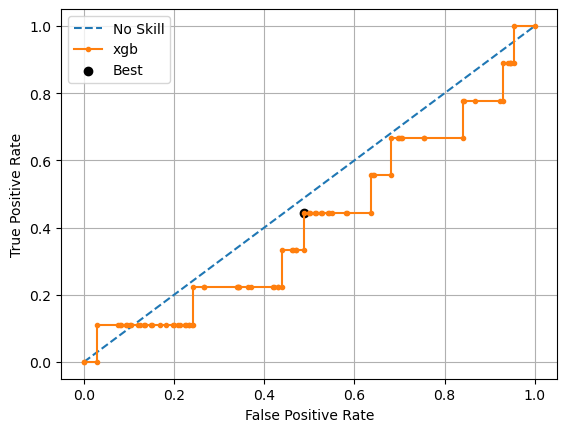

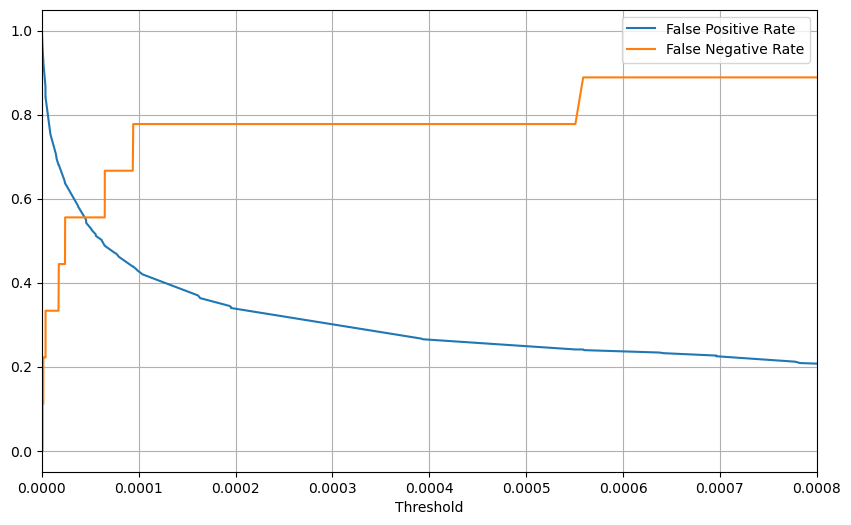

In [69]:
threshold = model_utils.get_thersholds_and_plots( X_train_val, y_train_val,X_val,y_val, model_xgb)

In [70]:
# validation 

,Pred 0(preds as N0 Subscriber)_train,Pred 1(pred as Subscriber)_train
True 0(No -Subscriber),TN = 1477 (TNR = 51.23%),FP = 1406 (FPR = 48.77%)
True 1(Subscriber),FN = 0 (FNR = 0.00%),TP = 22 (TPR = 100.00%)


,Pred 0(preds as N0 Subscriber)_val,Pred 1(pred as Subscriber)_val
True 0(No -Subscriber),TN = 633 (TNR = 51.21%),FP = 603 (FPR = 48.79%)
True 1(Subscriber),FN = 5 (FNR = 55.56%),TP = 4 (TPR = 44.44%)


,precision_score,recall_score,f1_score
train,0.015406,1.000000,0.030345
val,0.006590,0.444444,0.012987
train_no_skill,0.007573,0.500000,0.014920
val_no_skill,0.007229,0.500000,0.014252


Best Threshold=0.000065, G-Mean=0.477


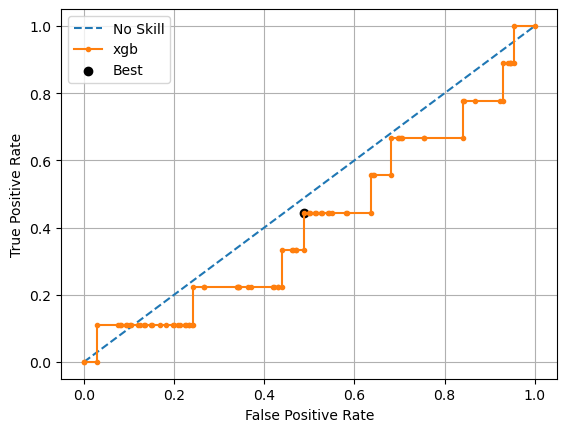

invalid value encountered in true_divide


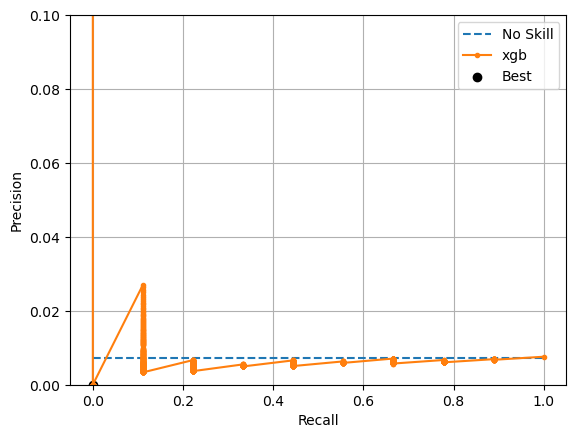

In [71]:
evaluation_utils.get_main_results(
                                  X_train_val
                                  , y_train_val
                                  , X_val
                                  , y_val, threshold
,model_xgb)

In [72]:
# test 

,Pred 0(preds as N0 Subscriber)_train,Pred 1(pred as Subscriber)_train
True 0(No -Subscriber),TN = 1775 (TNR = 43.09%),FP = 2344 (FPR = 56.91%)
True 1(Subscriber),FN = 0 (FNR = 0.00%),TP = 31 (TPR = 100.00%)


,Pred 0(preds as N0 Subscriber)_val,Pred 1(pred as Subscriber)_val
True 0(No -Subscriber),TN = 774 (TNR = 43.85%),FP = 991 (FPR = 56.15%)
True 1(Subscriber),FN = 2 (FNR = 14.29%),TP = 12 (TPR = 85.71%)


,precision_score,recall_score,f1_score
train,0.013053,1.000000,0.025769
val,0.011964,0.857143,0.023599
train_no_skill,0.007470,0.500000,0.014720
val_no_skill,0.007870,0.500000,0.015495


Best Threshold=0.000392, G-Mean=0.664


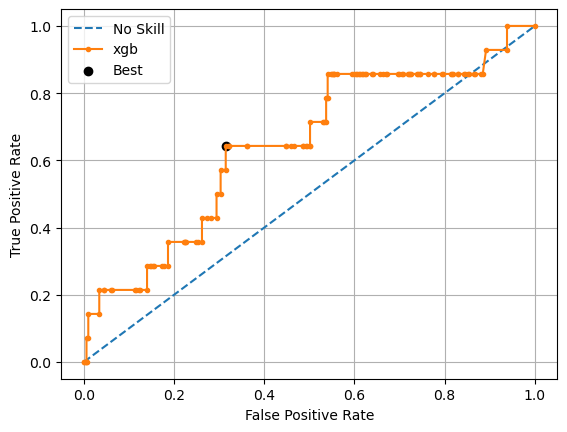

invalid value encountered in true_divide


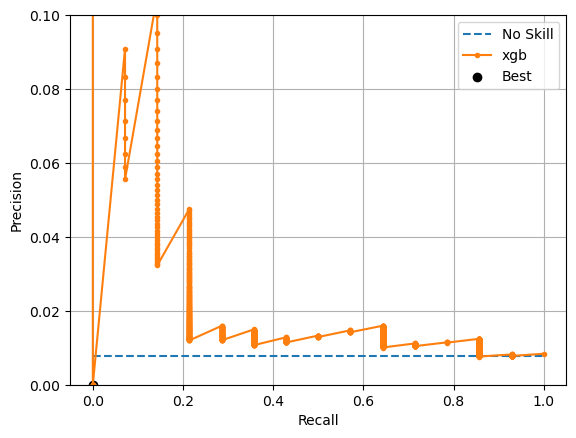

In [73]:
evaluation_utils.get_main_results(
                                  X_train
                                  , y_train
                                  , X_test
                                  , y_test, threshold
                                    ,model_xgb
)

In [36]:
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [37]:
# Fits the explainer
explainer = shap.Explainer(model_xgb.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Permutation explainer:  41%|███████          | 737/1779 [00:48<01:26, 12.04it/s]


KeyboardInterrupt: 

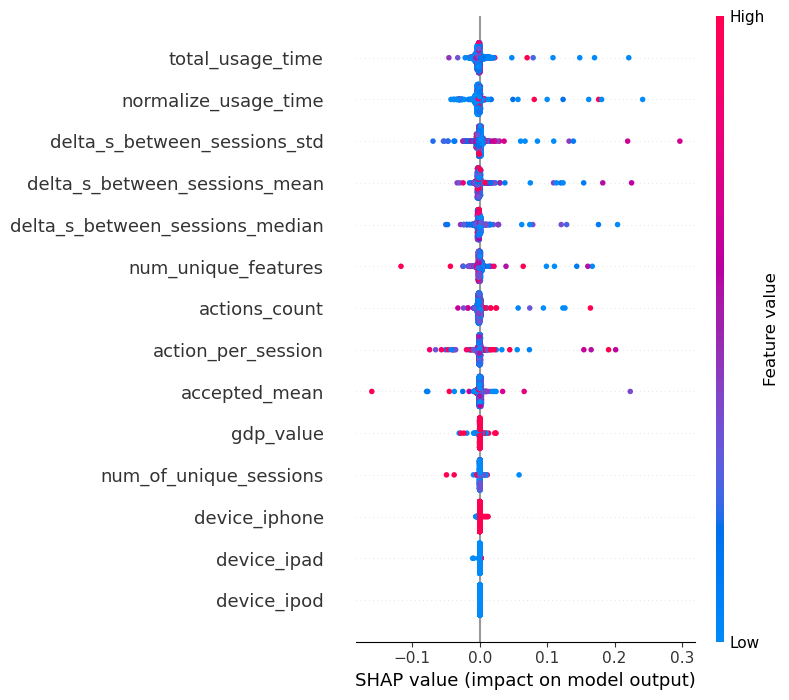

In [59]:
shap.summary_plot(shap_values)

In [60]:
data_table.columns

Index(['total_usage_time', 'num_unique_features', 'num_of_unique_sessions',
       'accepted_mean', 'actions_count', 'gdp_value',
       'delta_s_between_sessions_mean', 'delta_s_between_sessions_median',
       'delta_s_between_sessions_std', 'device_ipad', 'device_iphone',
       'device_ipod', 'action_per_session', 'subscriber',
       'normalize_usage_time'],
      dtype='object')

In [62]:
top_7_according_to_shap= ['total_usage_time', 'num_unique_features', 'actions_count', 
       'delta_s_between_sessions_mean', 'delta_s_between_sessions_median',
       'delta_s_between_sessions_std', 'subscriber',
       'normalize_usage_time']